In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
# pre load sklearn iris datasets
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [7]:
iris = datasets.load_iris()

X = iris.data  
Y = iris.target

dataset = []

In [8]:
target_label = 0 # choose the target label of flower type
for index, x in enumerate(X):
    transform_label = None
    if Y[index] == target_label:
        transform_label = 1 # is the type
    else:
        transform_label = 0 # is not the type
    x = [x[0], x[2]]
    dataset.append((x,transform_label))

In [14]:
dataset = np.array(dataset)

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def sgd(dataset, w):
    #run sgd randomly
    index = random.randint(0, len(dataset) - 1)
    x, y = dataset[index]
    x = np.array(x)
    error = sigmoid(w.T.dot(x))
    g = (error - y) * x
    return g

In [17]:
def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        total_cost += abs(y - error)
    return total_cost

In [18]:
def logistic_regression(dataset):
    w = np.zeros(2)
    limit = 1500 #update times
    eta = 0.1 #update rate
    costs = []
    for i in range(limit):
        current_cost = cost(dataset, w)
        if i % 100 == 0:
            print ("epoch = " + str(i/100 + 1) + ": current_cost = ", current_cost)
        costs.append(current_cost)
        w = w - eta * sgd(dataset, w)
        eta = eta * 0.98 #decrease update rate
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)

In [19]:
def main():
    #execute
    w = logistic_regression(dataset)
    #draw 
    ps = [v[0] for v in dataset]
    label = [v[1] for v in dataset]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    #plot via label
    tpx=[]
    for index, label_value in enumerate(label):
        px=ps[index][0]
        py=ps[index][1]
        tpx.append(px)
        if label_value == 1:
            ax1.scatter(px, py, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py, c='r', marker="x", label='X')

    l = np.linspace(min(tpx),max(tpx))
    a,b = (-w[0][0]/w[0][1], w[0][0])
    ax1.plot(l, a*l + b, 'g-')
    #plt.legend(loc='upper left');
    plt.show()

    limit = w[1][0]
    costs = w[1][1]
    w = w[0]

    # calculate score
    predicted_Y=[]
    answer_Y=[]
    for X,Y in dataset:
        answer_Y.append(Y)
        predicted_Y.append(sigmoid(w.T.dot(X)))
    predicted_Y = np.asarray(predicted_Y)
    predicted_Y = predicted_Y > 0.5
    #print(answer_Y)
    #print(predicted_Y)
    print ("Accuracy: ",str(accuracy_score(answer_Y, predicted_Y)*100)[:5],"%")

epoch = 1.0: current_cost =  75.0
epoch = 2.0: current_cost =  25.509266095084524
epoch = 3.0: current_cost =  23.414647609392574
epoch = 4.0: current_cost =  23.203891234745505
epoch = 5.0: current_cost =  23.138201212619073
epoch = 6.0: current_cost =  23.13429995155694
epoch = 7.0: current_cost =  23.133135268919233
epoch = 8.0: current_cost =  23.133084306537956
epoch = 9.0: current_cost =  23.1330768202408
epoch = 10.0: current_cost =  23.133076114852283
epoch = 11.0: current_cost =  23.133075854342213
epoch = 12.0: current_cost =  23.13307582230457
epoch = 13.0: current_cost =  23.13307581989595
epoch = 14.0: current_cost =  23.133075819038684
epoch = 15.0: current_cost =  23.133075818963984


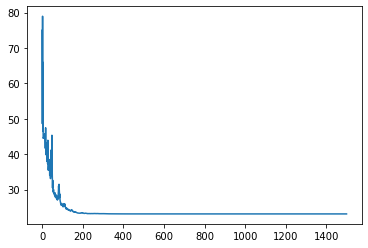

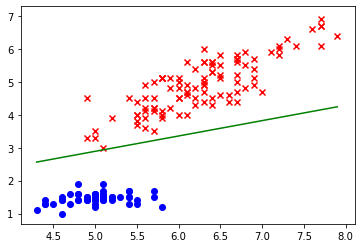

Accuracy:  100.0 %


In [20]:
if __name__ == '__main__':
    main()